In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
dataset = pd.read_csv('top50.csv')

In [4]:
dataset.shape

(50, 11)

In [5]:
dataset.describe()

,Song num,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


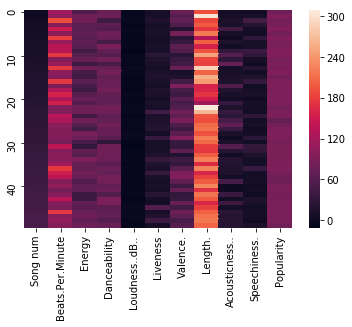

In [6]:
sns.heatmap(dataset,yticklabels=10)

In [7]:
dataset.isnull().any()

Song num            False
Beats.Per.Minute    False
Energy              False
Danceability        False
Loudness..dB..      False
Liveness            False
Valence.            False
Length.             False
Acousticness..      False
Speechiness.        False
Popularity          False
dtype: bool

In [8]:
dataset = dataset.fillna(method='ffill')

In [9]:
X=dataset[['Energy','Danceability','Loudness..dB..','Liveness','Valence.','Length.','Acousticness..','Speechiness.']].values
y=dataset['Popularity'].values

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()


<Figure size 1080x720 with 0 Axes>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
print(regressor.coef_)

[-0.00121801 -0.00788814  0.23998728  0.06323681 -0.04531292 -0.01805599
 -0.02899677  0.16743247]


In [15]:
print(regressor.intercept_)

93.18798853349675


In [16]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(25)
print(df1)

   Actual  Predicted
0      91  86.369148
1      86  87.741154
2      93  90.780079
3      90  85.913260
4      85  93.650476
5      89  85.848689
6      80  85.247885
7      89  89.550122
8      83  84.620631
9      94  88.278704


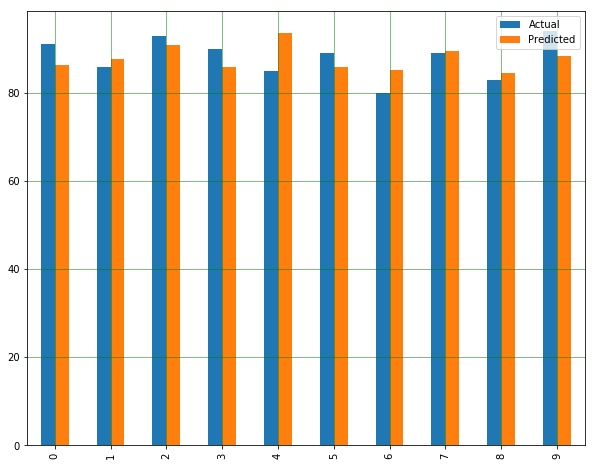

In [17]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.7620389561130394
Mean Squared Error: 19.407001168970485
Root Mean Squared Error: 4.405337804183747


In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_pred)

-0.09028096454890355